In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
filename = 'https://ifcs.boku.ac.at/repository/data/spike_sorting/spike_sorting.csv'
X = pd.read_csv(filename)

In [ ]:
X.head()

In [ ]:
y = X.iloc[:, 96]
y

In [ ]:
X = X.iloc[:, :96]    #This is our datamatrix

In [ ]:
n, p = X.shape


In [ ]:
print(n, p)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


In [22]:
(pca.components_).shape  
#each row is a component

(2, 96)

In [23]:
Z = X @ (pca.components_).T   #projections onto first 2 PCs

In [36]:
Z.shape

(20000, 2)

In [39]:
type(Z)

pandas.core.frame.DataFrame

In [26]:
kmeans_data = KMeans(n_clusters = 2, init = 'random', n_init = 100 )

In [30]:
kmeans_data.fit(Z)   


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=100, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [33]:
lab = kmeans_data.labels_
len(kmeans_data.labels_)

20000

In [42]:
full_df = pd.concat([Z, pd.DataFrame(lab)], axis = 1)


,0,1,0
0,14555.688155,66540.571651,1
1,14262.413877,66238.768369,1
2,96197.196759,38140.175502,1
3,-169456.895645,209069.243660,0
4,25526.144683,26693.373040,1


In [46]:
full_df.columns = [0, 1, 2]
full_df.head()

,0,1,2
0,14555.688155,66540.571651,1
1,14262.413877,66238.768369,1
2,96197.196759,38140.175502,1
3,-169456.895645,209069.243660,0
4,25526.144683,26693.373040,1


<Figure size 432x288 with 0 Axes>

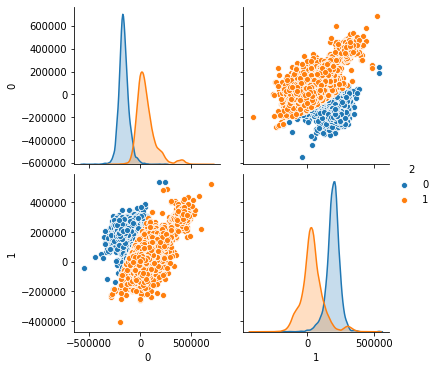

In [47]:
plt.figure()
sns.pairplot(data = full_df, hue = 2)

<Figure size 432x288 with 0 Axes>

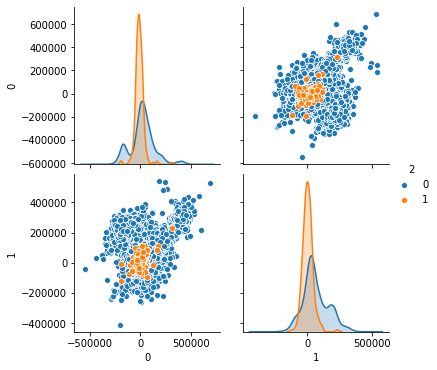

In [50]:
#We see K means doesn't perform well with non-convex domains
full_df2 = pd.concat([Z, y], axis = 1)
full_df2.columns = [0,1,2]
plt.figure()
sns.pairplot(data = full_df2, hue = 2)
